# Exercise 11

Given the iris dataset, split the dataset into training and test set; use 90% of data for training and 10% for testing. Implement least squares linear regression, using the pseudo-inverse to find the weights that minimize the linear model, in order to predict the PetalWidth using the PetalLength. In order to assess the performance of the model, compute the root mean square error on the test set. Then create a scatter plot of the data points in the two given dimensions, plotting with different colors the points belonging to the training or the test set. Also, plot the line that you have found by applying linear regression.

TIPS:
* you can use pandas.Dataframe.sample and pandas.Dataframe.drop to split the dataset
* to compute the pseudo-inverse of the linear system, you can use scipy.solve or define directly matrix operations using numpy operators
* you should obtain a plot similar to the following

### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

### import iris dataset and split it in 90% for training and 10% for testing

In [2]:
frame = pd.read_csv("iris.data", names = ["SepalLength","SepalWidth","PetalLength","PetalWidth","Class"])
train_sample = frame.sample(frac=0.9)
mask = [True]*frame.shape[0]
for i in train_sample.index:
    mask[i] = False    
test_sample = frame[mask]

In [24]:
def least_square_linear_regression(X, y):
    """
    Return the optimal weights arrey using the pseudo inversa.
    """     
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return w
    
X = np.matrix(train_sample["PetalLength"]).T
y = np.array(train_sample["PetalWidth"])

weights = least_square_linear_regression(X, y)

In [25]:
def predict(data, w):
    """
    Predict output of data with the weights w.
    """     
    y = []
    for n in data:
        y.append(n*w)
    return y

data = np.array(test_sample["PetalLength"])
predictions = predict(data, weights)


def compute_RMS(truth, predictions):
    """
    Compute the root mean square between real values and predictions.
    """     
    RMS = 0
    for i in range(len(truth)):
        RMS += math.pow(truth[i] - predictions[i], 2) 
    RMS = RMS/len(truth)
    RMS = math.sqrt(RMS)
    return RMS

compute_RMS(np.array(test_sample["PetalLength"]), predictions)

2.8795679650355828

### plot time

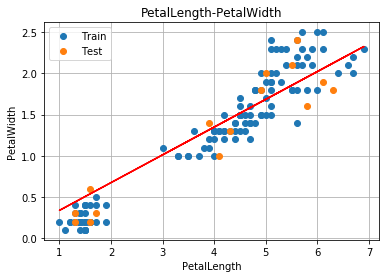

In [27]:
def plot_pairs(train_sample, test_sample, pairs, line):
    """
    Plot the frame with different label based on the sample.
    """       
    
    x_label = pairs[0]
    y_label = pairs[1]
        
    #train sample
    x = train_sample[x_label]
    y = train_sample[y_label]
    plt.title(x_label+"-"+y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y, 'o', label="Train")
    
    #test sample
    x = test_sample[x_label]
    y = test_sample[y_label]
    plt.title(x_label+"-"+y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y, 'o', label="Test")
    
    #linear
    plt.plot(line[0], line[1], color='red')
        
    plt.grid(True)
    plt.legend()
    plt.show()
    

plot_pairs(train_sample, test_sample, ["PetalLength", "PetalWidth"], [X, X.dot(weights)])